In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
trips = pd.read_csv('/home/florencia/Datos/Data/sf-bay-area-bike-share/trip.csv', low_memory=False)

In [3]:
trips.dtypes

id                     int64
duration               int64
start_date            object
start_station_name    object
start_station_id       int64
end_date              object
end_station_name      object
end_station_id         int64
bike_id                int64
subscription_type     object
zip_code              object
dtype: object

In [4]:
trips.head(10)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103
5,4927,103,8/29/2013 18:54,Golden Gate at Polk,59,8/29/2013 18:56,Golden Gate at Polk,59,527,Subscriber,94109
6,4500,109,8/29/2013 13:25,Santa Clara at Almaden,4,8/29/2013 13:27,Adobe on Almaden,5,679,Subscriber,95112
7,4563,111,8/29/2013 14:02,San Salvador at 1st,8,8/29/2013 14:04,San Salvador at 1st,8,687,Subscriber,95112
8,4760,113,8/29/2013 17:01,South Van Ness at Market,66,8/29/2013 17:03,South Van Ness at Market,66,553,Subscriber,94103
9,4258,114,8/29/2013 11:33,San Jose City Hall,10,8/29/2013 11:35,MLK Library,11,107,Subscriber,95060


In [5]:
trips.start_date = pd.to_datetime(trips.start_date, format='%m/%d/%Y %H:%M')
trips.end_date = pd.to_datetime(trips.end_date, format='%m/%d/%Y %H:%M')

trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
dtype: object

# Top 20 de las estaciones desde las cuales salen más bicicletas

<IPython.core.display.Javascript object>


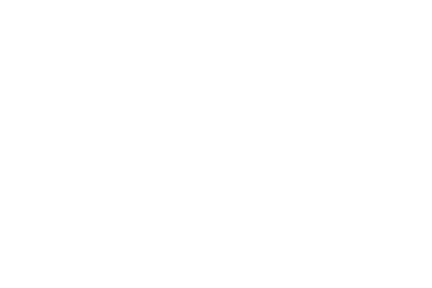

In [6]:
%matplotlib notebook

count_start_station = trips['start_station_id'].value_counts()

css = count_start_station[:20].plot('bar', title = 'Top 20 estaciones origen')
css.set_ylabel('Cantidad')
css.set_xlabel('Id estacion')

## Top 20 de las estaciones a las cuales llegan más bicicletas

<IPython.core.display.Javascript object>


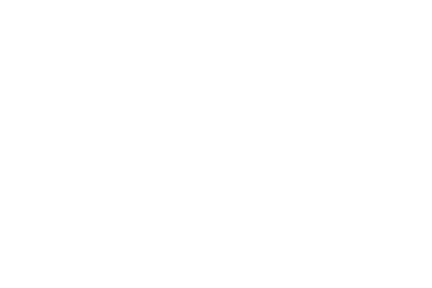

In [7]:
%matplotlib notebook

count_end_station = trips['end_station_id'].value_counts()
count_end_station

ces = count_end_station[:20].plot('bar', title = 'Top 20 estaciones destino' )
ces.set_ylabel('Cantidad')
ces.set_xlabel('Id estacion')

## Top 15 viajes más comunes según origen y destino

/usr/lib/python2.7/dist-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


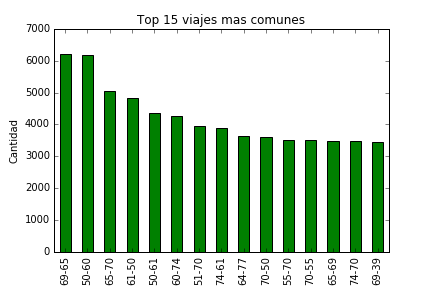

In [8]:
%matplotlib notebook

common_trips = trips[['start_station_id','end_station_id']]

common_trips.start_station_id = common_trips.start_station_id.astype(str)
common_trips.end_station_id = common_trips.end_station_id.astype(str)

common_trips['start_end'] = (common_trips.start_station_id + '-' + common_trips.end_station_id)

aux = common_trips['start_end'].value_counts()
ct = aux[:15].plot(kind='bar',title='Top 15 viajes mas comunes',color='green')
ct.set_ylabel('Cantidad')
ct.set_xlabel('Origen - Destino')


## Correlacion entre duracion promedio en segundos y temperatura promedio en Fahrenheit

In [9]:
# Para filtrar aquellos viajes que duran menos de 24 hs (menos de 86400 segundos)
trips_menos_1 = trips.loc[trips.duration < 86400,:]

trips_menos_1.tail(12)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
669947,432966,17396,2014-09-01 07:37:00,Mountain View City Hall,27,2014-09-01 12:27:00,Mountain View City Hall,27,140,Customer,94085
669948,432965,17297,2014-09-01 07:37:00,Mountain View City Hall,27,2014-09-01 12:25:00,Mountain View City Hall,27,57,Customer,94085
669949,432964,169,2014-09-01 07:32:00,Embarcadero at Bryant,54,2014-09-01 07:35:00,Embarcadero at Folsom,51,496,Subscriber,94105
669950,432960,5667,2014-09-01 07:03:00,Japantown,9,2014-09-01 08:38:00,Japantown,9,56,Customer,95112
669951,432959,441,2014-09-01 06:58:00,Market at 10th,67,2014-09-01 07:05:00,Market at Sansome,77,617,Subscriber,94132
669952,432957,398,2014-09-01 05:54:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-09-01 06:00:00,Steuart at Market,74,561,Subscriber,94112
669953,432952,240,2014-09-01 04:59:00,South Van Ness at Market,66,2014-09-01 05:03:00,Civic Center BART (7th at Market),72,292,Subscriber,94102
669954,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,94118
669955,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
669956,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,32


In [10]:
# Para separar por anio , mes y dia
trips_menos_1['year'] = pd.DatetimeIndex(trips_menos_1['start_date']).year
trips_menos_1['month'] = pd.DatetimeIndex(trips_menos_1['start_date']).month
trips_menos_1['day'] = pd.DatetimeIndex(trips_menos_1['start_date']).day

trips_menos_1.head(15)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,year,month,day
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013,8,29
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013,8,29
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013,8,29
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013,8,29
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013,8,29
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,2013,8,29
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013,8,29
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,2013,8,29
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,2013,8,29
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013,8,29


In [11]:
weather = pd.read_csv('/home/florencia/Datos/Data/sf-bay-area-bike-share/weather.csv', low_memory=False)

weather.date = pd.to_datetime(weather.date, format='%m/%d/%Y')

# Para separar por anio , mes y dia
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month
weather['day'] = pd.DatetimeIndex(weather['date']).day

In [12]:
#Veo que zipcode tiene menor cantidad de nulls porque para cada fecha hay un registro por zipcode
for zip_code in weather.zip_code.unique():
    print zip_code
    print (weather[weather.zip_code == zip_code].isnull().sum())
    print ()

94107
date                                0
max_temperature_f                   0
mean_temperature_f                  0
min_temperature_f                   0
max_dew_point_f                     0
mean_dew_point_f                    0
min_dew_point_f                     0
max_humidity                        0
mean_humidity                       0
min_humidity                        0
max_sea_level_pressure_inches       0
mean_sea_level_pressure_inches      0
min_sea_level_pressure_inches       0
max_visibility_miles                0
mean_visibility_miles               0
min_visibility_miles                0
max_wind_Speed_mph                  0
mean_wind_speed_mph                 0
max_gust_speed_mph                 13
precipitation_inches                0
cloud_cover                         0
events                            574
wind_dir_degrees                    0
zip_code                            0
year                                0
month                               0
day   

In [13]:
# Me quedo con el zip code 94107 pues es el que presenta menos cantidad de valores nulos 
weather_94107 = weather.loc[weather['zip_code'] == 94107 , :]

weather_94107.head(10)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,year,month,day
0,2013-08-29,74,68,61,61,58,56,93,75,57,...,11,28,0,4,NaN,286,94107,2013,8,29
1,2013-08-30,78,69,60,61,58,56,90,70,50,...,13,35,0,2,NaN,291,94107,2013,8,30
2,2013-08-31,71,64,57,57,56,54,93,75,57,...,15,31,0,4,NaN,284,94107,2013,8,31
3,2013-09-01,74,66,58,60,56,53,87,68,49,...,13,29,0,4,NaN,284,94107,2013,9,1
4,2013-09-02,75,69,62,61,60,58,93,77,61,...,12,30,0,6,NaN,277,94107,2013,9,2
5,2013-09-03,73,67,60,59,56,51,84,65,46,...,15,31,0,2,NaN,276,94107,2013,9,3
6,2013-09-04,74,68,61,59,57,56,90,72,53,...,19,35,0,4,NaN,269,94107,2013,9,4
7,2013-09-05,72,66,60,57,56,54,90,74,57,...,21,37,0,3,NaN,270,94107,2013,9,5
8,2013-09-06,85,71,56,57,51,45,86,58,29,...,8,28,0,0,NaN,287,94107,2013,9,6
9,2013-09-07,88,73,58,64,54,46,86,59,31,...,8,25,0,1,NaN,305,94107,2013,9,7


In [14]:
trips_weather_94107 = pd.merge(trips_menos_1,weather_94107,how='left',on=['year','month','day'])

trips_weather_94107.head(20)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,...,10,10,23,11,28,0,4,NaN,286,94107


<IPython.core.display.Javascript object>


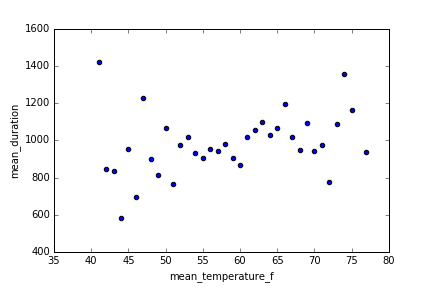

In [15]:
# Convierto la serie obtenida en un Dataframe para el plot
aux_df = trips_weather_94107.groupby('mean_temperature_f')['duration'].mean().to_frame()

aux_df.reset_index(inplace=True)
aux_df.columns = ['mean_temperature_f','mean_duration']

aux_df.plot(kind='scatter',x='mean_temperature_f',y='mean_duration')
plt.show()

<IPython.core.display.Javascript object>


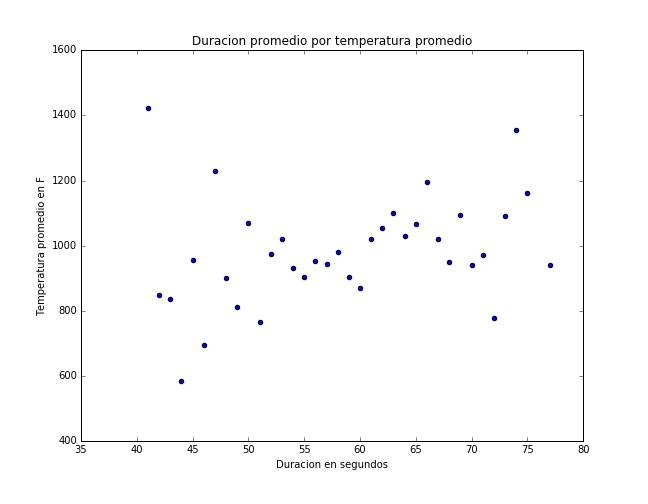

In [16]:
%matplotlib notebook
plt.figure(figsize = [9,7])

sc1 = plt.scatter(aux_df['mean_temperature_f'],aux_df['mean_duration'],alpha =1)
plt.title('Duracion promedio por temperatura promedio')
plt.xlabel('Duracion en segundos')
plt.ylabel('Temperatura promedio en F')

## Veo la relacion que hay entre las diferentes variables

<IPython.core.display.Javascript object>


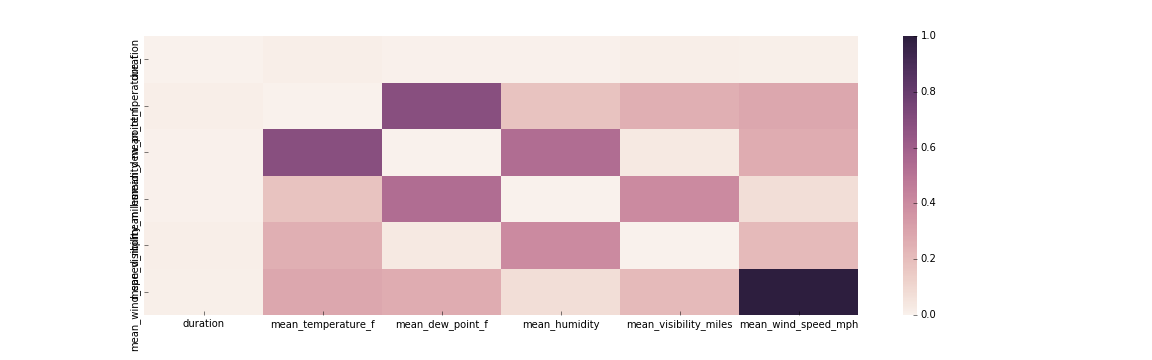

In [18]:
# Para los viajes que duran menos de un dia, me sigo quedando con el zip_code 94107
# analizo la relacion que existe entre las diferentes variables, mientras más oscuro, más 
# fuerte es la relación

fig, ax = plt.subplots(figsize=(16,5));        # Sample figsize in inches

cor = trips_weather_94107.loc[:,['duration','mean_temperature_f','mean_dew_point_f','mean_humidity','mean_visibility_miles','mean_wind_speed_mph']]\
        .corr().abs()
cor.values[[np.arange(5)]*2] = 0
sns.heatmap(cor);